In [1]:
import numpy as np
import pandas as pd

DATA_PATH = "../data/mbti_1.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
# get training data
def get_train_data(datapath=DATA_PATH):
    train_data = pd.read_csv(datapath)
    X = train_data['posts']
    y = train_data['type']
    return X, y

# split data into train and test
# form dataframe
def split_data(dataframe, size=0.2):
    train_data = dataframe.sample(frac=1-size, random_state=0)
    test_data = dataframe.drop(train_data.index)
    return train_data, test_data

# applying tf-idf vectorizer
def tfidf_vectorizer(X_train, X_test):
    vectorizer = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words='english')
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    return X_train, X_test

# encode labels
def encode_labels(y):
    ie_encoding = {"I":1 , "E":-1}
    ns_encoding = {"N":1 , "S":-1}
    tf_encoding = {"T":1 , "F":-1}
    pj_encoding = {"P":1 , "J":-1}
    y_encoded = np.zeros((len(y), 4))
    for i, _y in enumerate(y):
        y_encoded[i][0] = ie_encoding[_y[0]]
        y_encoded[i][1] = ns_encoding[_y[1]]
        y_encoded[i][2] = tf_encoding[_y[2]]
        y_encoded[i][3] = pj_encoding[_y[3]]
    
    return y_encoded 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'INFJ'),
  Text(1, 0, 'ENTP'),
  Text(2, 0, 'INTP'),
  Text(3, 0, 'INTJ'),
  Text(4, 0, 'ENTJ'),
  Text(5, 0, 'ENFJ'),
  Text(6, 0, 'INFP'),
  Text(7, 0, 'ENFP'),
  Text(8, 0, 'ISFP'),
  Text(9, 0, 'ISTP'),
  Text(10, 0, 'ISFJ'),
  Text(11, 0, 'ISTJ'),
  Text(12, 0, 'ESTP'),
  Text(13, 0, 'ESFP'),
  Text(14, 0, 'ESTJ'),
  Text(15, 0, 'ESFJ')])

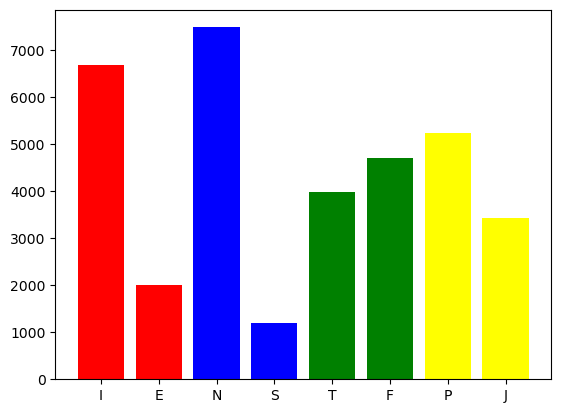

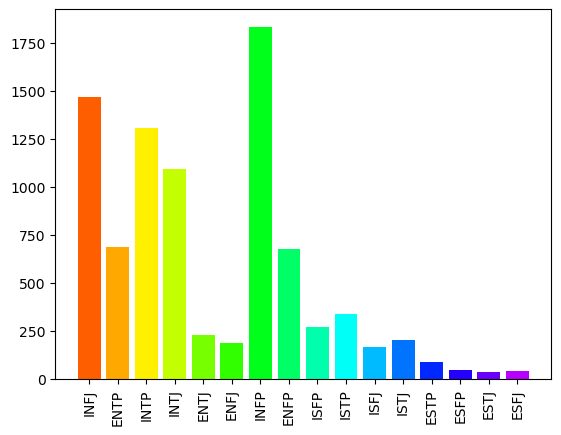

In [3]:
# for each mbti type, 4 different classifiers are trained
# I/E, N/S, T/F, P/J
# view the counts for those 8 types
def get_counts(y_train):
    counts = {"I":0, "E":0, "N":0, "S":0, "T":0, "F":0, "P":0, "J":0}
    for i in range(len(y_train)):
        for c in y_train[i]:
            counts[c] += 1
    return counts

# plot the counts and labels with text
# I/E, N/S, T/F, P/J with 4 different colors
import matplotlib.pyplot as plt
X_train, _y = get_train_data(datapath=DATA_PATH)
counts = get_counts(_y)
plt.bar(range(len(counts)), list(counts.values()), align='center', color=['red', 'red', 'blue', 'blue', 'green', 'green', 'yellow', 'yellow'])
plt.xticks(range(len(counts)), list(counts.keys()))

# also plot the counts for 16 different types
def get_counts_16(y_train):
    counts = {}
    for i in range(len(y_train)):
        if y_train[i] not in counts:
            counts[y_train[i]] = 1
        else:
            counts[y_train[i]] += 1
    return counts
counts_16 = get_counts_16(_y)
# plot them with 16 different colors and labels
# in a new figure, and make the x inerval bigger
cmap = plt.get_cmap('gist_rainbow')
plt.figure()
plt.bar(range(len(counts_16)), list(counts_16.values()), align='center', color = cmap(np.linspace(0.1, 0.9, len(counts_16))))
plt.xticks(range(len(counts_16)), list(counts_16.keys()))
plt.xticks(rotation=90)

If we directly classify the data to 16 classes, since the data distribution is not balenced, the model will be biased to the majority class.
If we seperately train 4 classifiers, each respectively for 1 personality dimension, the dataset will be more balanced, and the model will be more accurate.

[[ 1.         -0.04589856 -0.06957279 -0.1619395 ]
 [-0.04589856  1.         -0.08095363 -0.01492205]
 [-0.06957279 -0.08095363  1.          0.00467333]
 [-0.1619395  -0.01492205  0.00467333  1.        ]]


<Axes: >

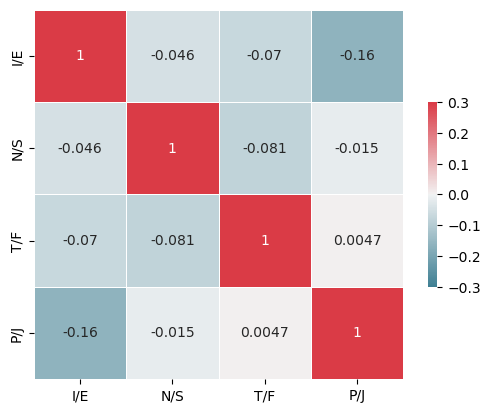

In [4]:
# correlation matrix for 4 dimensions
# I/E, N/S, T/F, P/J
def get_correlation_matrix(y_train):
    y_encoded = encode_labels(y_train)
    correlation_matrix = np.corrcoef(y_encoded.T)
    return correlation_matrix
    
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# plot the correlation matrix
correlation_matrix = get_correlation_matrix(_y)
print(correlation_matrix)
# plt.figure()
# plt.imshow(correlation_matrix, cmap=cmap, interpolation='nearest')
# # shoe xticks on the top of the figure
# plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False , labeltop=True)
# plt.xticks(range(4), ['I/E', 'N/S', 'T/F', 'P/J'])
# plt.yticks(range(4), ['I/E', 'N/S', 'T/F', 'P/J'])
sns.heatmap(
    correlation_matrix,          # The data to plot
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=.3,       # The maximum value of the legend. All higher vals will be same color
    vmin=-.3,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5},  # Extra kwargs for the legend; in this case, shrink by 50%
    xticklabels=['I/E', 'N/S', 'T/F', 'P/J'],
    yticklabels=['I/E', 'N/S', 'T/F', 'P/J']
    
)


In [5]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
# clean the data
# remove urls, and punctuations
# remove stop words
# remove numbers
# remove MBTI types
def clean_data(X_train):
    ps = PorterStemmer()
    X_train_cleaned = []
    for i in range(len(X_train)):
        # remove urls
        X_train[i] = re.sub(r'http\S+', '', X_train[i])
        # remove punctuations
        X_train[i] = X_train[i].translate(str.maketrans('', '', string.punctuation))
        # remove stop words
        # X_train[i] = ' '.join([word for word in X_train[i].split() if word not in stopwords.words('english')]) # remove numbers
        X_train[i] = ''.join([i for i in X_train[i] if not i.isdigit()])
        # stemming
        # X_train[i] = ' '.join([ps.stem(word) for word in X_train[i].split()])
        # remove MBTI types
        mbti_types = ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp','isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
        for mbti_type in mbti_types:
            X_train[i] = X_train[i].replace(mbti_type, '')
        # also upper case
        for mbti_type in mbti_types:
            X_train[i] = X_train[i].replace(mbti_type.upper(), '')
        X_train_cleaned.append(X_train[i])
    return X_train_cleaned

[nltk_data] Downloading package stopwords to /home/tan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df.posts[0].split('|||').__len__()
# average word counts per post
# average word length per word
X_train, _y = get_train_data(datapath=DATA_PATH)
X_train_cleaned = clean_data(X_train)

In [7]:
from textblob import TextBlob
def get_average_length_and_emotion(X_train):
    average_word_counts = []
    average_word_length = []
    average_emo_score = []
    for i in range(len(X_train)):
        posts = X_train[i].split('|||')
        total_word_counts = 0
        total_char_counts = 0
        emo_score = 0
        for post in posts:
            blob = TextBlob(post)
            emo_score += blob.sentiment.polarity
            words = post.split()
            total_word_counts += len(words)
            for word in words:
                total_char_counts += len(word)
        average_word_counts.append(total_word_counts / len(posts))
        average_word_length.append(total_char_counts / total_word_counts)
        average_emo_score.append(emo_score / len(posts))
    return average_word_counts, average_word_length, average_emo_score
df['cleaned_posts'] = X_train_cleaned
df['average_word_counts'], df['average_word_length'], df['average_emo_score'] = get_average_length_and_emotion(df.posts)

In [8]:
y_encoded = encode_labels(df.type)
df['y_encoded'] = y_encoded.tolist()
# save df to csv
df.to_csv('../data/mbti_1_cleaned.csv', index=False)


In [9]:
# split the data into train and test
# by df, y is df.y_encoded, x is other columns
df_train, df_test = split_data(df, size=0.2)
tfidf_train, tfidf_test = tfidf_vectorizer(df_train.cleaned_posts, df_test.cleaned_posts)


In [10]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# only use tfidf as features
# train the model
# predict and get accuracy
def train_model(X_train, y_train, X_test, y_test, models):
    for i,model in enumerate(models):
        model.fit(X_train, y_train[:,i])
        y_pred = model.predict(X_test)
        print("Accuracy for dimension {} is {}".format(i, accuracy_score(y_test[:,i], y_pred)))
        print(classification_report(y_test[:,i], y_pred))
        print("\n")

models = [SVC(), SVC(), SVC(), SVC()]
# train the model, use 4 different classifiers
# each predicts one dimension of y_encoded
y_encoded_train = np.array( df_train.y_encoded.tolist() )
y_encoded_test = np.array( df_test.y_encoded.tolist() )
# train_model(tfidf_train, y_encoded_train, tfidf_test, y_encoded_test, models)


In [11]:
# use average word counts, average word length, average emotion score as features
# normalize the features
# train the model
# predict and get accuracy
from sklearn import preprocessing
X_train_3features = df_train[['average_word_counts', 'average_word_length', 'average_emo_score']].values
X_test_3features = df_test[['average_word_counts', 'average_word_length', 'average_emo_score']].values
X_train_3features = preprocessing.normalize(X_train_3features)
X_test_3features = preprocessing.normalize(X_test_3features)
models_3features = [SVC(), SVC(), SVC(), SVC()]
train_model(X_train_3features, y_encoded_train, X_test_3features, y_encoded_test, models_3features)


Accuracy for dimension 0 is 0.7780979827089337
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       385
         1.0       0.78      1.00      0.88      1350

    accuracy                           0.78      1735
   macro avg       0.39      0.50      0.44      1735
weighted avg       0.61      0.78      0.68      1735





/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy for dimension 1 is 0.8512968299711815
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       258
         1.0       0.85      1.00      0.92      1477

    accuracy                           0.85      1735
   macro avg       0.43      0.50      0.46      1735
weighted avg       0.72      0.85      0.78      1735





/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy for dimension 2 is 0.5365994236311239
              precision    recall  f1-score   support

        -1.0       0.54      1.00      0.70       931
         1.0       0.00      0.00      0.00       804

    accuracy                           0.54      1735
   macro avg       0.27      0.50      0.35      1735
weighted avg       0.29      0.54      0.37      1735





/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy for dimension 3 is 0.6092219020172911
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       677
         1.0       0.61      1.00      0.76      1058

    accuracy                           0.61      1735
   macro avg       0.30      0.50      0.38      1735
weighted avg       0.37      0.61      0.46      1735





In [12]:
# balance the data by its label using SMOTE
# make sure each label has the same number of samples
from imblearn.over_sampling import SMOTE
from collections import Counter
def balance_data(X_train, y_train):
    sm = SMOTE(random_state=42)
    X_train, y_train = sm.fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_train))
    return X_train, y_train

# SMOTE on 4 dimensions
# train the model
models = [LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression()]
def train_model_balence(X_train, y_train, X_test, y_test, models):
    for i,model in enumerate(models):
        X_train_balenced, y_train_balenced = balance_data(X_train, y_train[:,i])
        model.fit(X_train_balenced, y_train_balenced)
        y_pred = model.predict(X_test)
        print("Accuracy for dimension {} is {}".format(i, accuracy_score(y_test[:,i], y_pred)))
        print(classification_report(y_test[:,i], y_pred))
        print("\n")

train_model_balence(X_train_3features, y_encoded_train, X_test_3features, y_encoded_test, models)

Resampled dataset shape Counter({1.0: 5326, -1.0: 5326})
Accuracy for dimension 0 is 0.39481268011527376
              precision    recall  f1-score   support

        -1.0       0.23      0.71      0.34       385
         1.0       0.79      0.31      0.44      1350

    accuracy                           0.39      1735
   macro avg       0.51      0.51      0.39      1735
weighted avg       0.66      0.39      0.42      1735



Resampled dataset shape Counter({-1.0: 6001, 1.0: 6001})
Accuracy for dimension 1 is 0.6484149855907781
              precision    recall  f1-score   support

        -1.0       0.16      0.33      0.22       258
         1.0       0.86      0.70      0.77      1477

    accuracy                           0.65      1735
   macro avg       0.51      0.52      0.49      1735
weighted avg       0.75      0.65      0.69      1735



Resampled dataset shape Counter({-1.0: 3763, 1.0: 3763})
Accuracy for dimension 2 is 0.530835734870317
              precision    rec

In [13]:
# use XGBoost to train the model
import xgboost as xgb
models_xgb = [xgb.XGBClassifier(), xgb.XGBClassifier(), xgb.XGBClassifier(), xgb.XGBClassifier()]
y_encoded_train_01 = y_encoded_train.copy()
y_encoded_train_01[y_encoded_train_01 == -1] = 0
y_encoded_test_01 = y_encoded_test.copy()
y_encoded_test_01[y_encoded_test_01 == -1] = 0
train_model_balence(X_train_3features, y_encoded_train_01, X_test_3features, y_encoded_test_01, models_xgb)

Resampled dataset shape Counter({1.0: 5326, 0.0: 5326})
Accuracy for dimension 0 is 0.5671469740634005
              precision    recall  f1-score   support

         0.0       0.24      0.44      0.31       385
         1.0       0.79      0.60      0.68      1350

    accuracy                           0.57      1735
   macro avg       0.52      0.52      0.50      1735
weighted avg       0.67      0.57      0.60      1735



Resampled dataset shape Counter({0.0: 6001, 1.0: 6001})
Accuracy for dimension 1 is 0.6461095100864553
              precision    recall  f1-score   support

         0.0       0.18      0.38      0.24       258
         1.0       0.86      0.69      0.77      1477

    accuracy                           0.65      1735
   macro avg       0.52      0.54      0.51      1735
weighted avg       0.76      0.65      0.69      1735



Resampled dataset shape Counter({0.0: 3763, 1.0: 3763})
Accuracy for dimension 2 is 0.575792507204611
              precision    recall 

In [14]:
# use all features and XGBoost to train the model
models_xgb_all = [xgb.XGBClassifier(), xgb.XGBClassifier(), xgb.XGBClassifier(), xgb.XGBClassifier()]
from scipy.sparse import hstack
X_train_all = hstack((tfidf_train, X_train_3features))
X_test_all = hstack((tfidf_test, X_test_3features))
# train_model_balence(X_train_all, y_encoded_train_01, X_test_all, y_encoded_test_01, models_xgb_all)

In [15]:
# add validation set
from sklearn.model_selection import train_test_split
X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(X_train_all, y_encoded_train_01, test_size=0.2, random_state=42)

# train XGBoost model with early stopping
def train_model_with_validation(X_train, y_train, X_val, y_val, X_test, y_test, models):
    for i,model in enumerate(models):
        model.fit(X_train, y_train[:,i], eval_set=[(X_val, y_val[:,i])], eval_metric='logloss', early_stopping_rounds=10)
        y_pred = model.predict(X_test)
        print("Accuracy for dimension {} is {}".format(i, accuracy_score(y_test[:,i], y_pred)))
        print(classification_report(y_test[:,i], y_pred))
        print("\n")
train_model_with_validation(X_train_all, y_train_all, X_val_all, y_val_all, X_test_all, y_encoded_test_01, models_xgb_all)

/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.54532
[1]	validation_0-logloss:0.54237
[2]	validation_0-logloss:0.53879
[3]	validation_0-logloss:0.53458
[4]	validation_0-logloss:0.53591
[5]	validation_0-logloss:0.53367
[6]	validation_0-logloss:0.53536
[7]	validation_0-logloss:0.53714
[8]	validation_0-logloss:0.53691
[9]	validation_0-logloss:0.53554
[10]	validation_0-logloss:0.53349
[11]	validation_0-logloss:0.53691
[12]	validation_0-logloss:0.53749
[13]	validation_0-logloss:0.53862
[14]	validation_0-logloss:0.53851
[15]	validation_0-logloss:0.54034
[16]	validation_0-logloss:0.54011
[17]	validation_0-logloss:0.53972
[18]	validation_0-logloss:0.53877
[19]	validation_0-logloss:0.53735
Accuracy for dimension 0 is 0.7769452449567723
              precision    recall  f1-score   support

         0.0       0.49      0.09      0.15       385
         1.0       0.79      0.97      0.87      1350

    accuracy                           0.78      1735
   macro avg       0.64      0.53      0.51      1735
weighted av

/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.39115
[1]	validation_0-logloss:0.38440
[2]	validation_0-logloss:0.38332
[3]	validation_0-logloss:0.38271
[4]	validation_0-logloss:0.38058
[5]	validation_0-logloss:0.37934
[6]	validation_0-logloss:0.38206
[7]	validation_0-logloss:0.38238
[8]	validation_0-logloss:0.38334
[9]	validation_0-logloss:0.38285
[10]	validation_0-logloss:0.38205
[11]	validation_0-logloss:0.38073
[12]	validation_0-logloss:0.38186
[13]	validation_0-logloss:0.38135
[14]	validation_0-logloss:0.38216
[15]	validation_0-logloss:0.38109
Accuracy for dimension 1 is 0.8501440922190202
              precision    recall  f1-score   support

         0.0       0.25      0.00      0.01       258
         1.0       0.85      1.00      0.92      1477

    accuracy                           0.85      1735
   macro avg       0.55      0.50      0.46      1735
weighted avg       0.76      0.85      0.78      1735





/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.66346
[1]	validation_0-logloss:0.64217
[2]	validation_0-logloss:0.63145
[3]	validation_0-logloss:0.62078
[4]	validation_0-logloss:0.61351
[5]	validation_0-logloss:0.60708
[6]	validation_0-logloss:0.59690
[7]	validation_0-logloss:0.59604
[8]	validation_0-logloss:0.59202
[9]	validation_0-logloss:0.58784
[10]	validation_0-logloss:0.58627
[11]	validation_0-logloss:0.58376
[12]	validation_0-logloss:0.57759
[13]	validation_0-logloss:0.57262
[14]	validation_0-logloss:0.57125
[15]	validation_0-logloss:0.57087
[16]	validation_0-logloss:0.56788
[17]	validation_0-logloss:0.56519
[18]	validation_0-logloss:0.56440
[19]	validation_0-logloss:0.56453
[20]	validation_0-logloss:0.56041
[21]	validation_0-logloss:0.55842
[22]	validation_0-logloss:0.55756
[23]	validation_0-logloss:0.55656
[24]	validation_0-logloss:0.56013
[25]	validation_0-logloss:0.55809
[26]	validation_0-logloss:0.55933
[27]	validation_0-logloss:0.56045
[28]	validation_0-logloss:0.55630
[29]	validation_0-loglos

/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/tan/anaconda3/envs/nlp/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.65460
[1]	validation_0-logloss:0.65060
[2]	validation_0-logloss:0.64359
[3]	validation_0-logloss:0.64456
[4]	validation_0-logloss:0.64498
[5]	validation_0-logloss:0.64524
[6]	validation_0-logloss:0.64296
[7]	validation_0-logloss:0.64396
[8]	validation_0-logloss:0.64343
[9]	validation_0-logloss:0.64313
[10]	validation_0-logloss:0.64369
[11]	validation_0-logloss:0.64460
[12]	validation_0-logloss:0.64518
[13]	validation_0-logloss:0.64579
[14]	validation_0-logloss:0.64594
[15]	validation_0-logloss:0.64954
[16]	validation_0-logloss:0.65122
Accuracy for dimension 3 is 0.6253602305475504
              precision    recall  f1-score   support

         0.0       0.54      0.26      0.35       677
         1.0       0.64      0.86      0.74      1058

    accuracy                           0.63      1735
   macro avg       0.59      0.56      0.54      1735
weighted avg       0.60      0.63      0.59      1735





In [19]:
print(classification_report(y_train_all[:,0], models_xgb_all[0].predict(X_train_all)))
print(classification_report(y_train_all[:,1], models_xgb_all[1].predict(X_train_all)))
print(classification_report(y_train_all[:,2], models_xgb_all[2].predict(X_train_all)))
print(classification_report(y_train_all[:,3], models_xgb_all[3].predict(X_train_all)))

              precision    recall  f1-score   support

         0.0       0.99      0.38      0.55      1284
         1.0       0.84      1.00      0.91      4268

    accuracy                           0.86      5552
   macro avg       0.92      0.69      0.73      5552
weighted avg       0.88      0.86      0.83      5552

              precision    recall  f1-score   support

         0.0       1.00      0.09      0.17       755
         1.0       0.88      1.00      0.93      4797

    accuracy                           0.88      5552
   macro avg       0.94      0.55      0.55      5552
weighted avg       0.89      0.88      0.83      5552

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2976
         1.0       0.99      0.99      0.99      2576

    accuracy                           0.99      5552
   macro avg       0.99      0.99      0.99      5552
weighted avg       0.99      0.99      0.99      5552

              preci